# Lab 7 Data

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Constants

In [31]:
width = 3.18  # cm
thickness = 0.46  # cm
length = 48  # cm
volume = length*width*thickness  # cm^3
density = 2.77  # g/cm

massBar = density*volume
print('mass of bar =', massBar, 'g')

gammaL = 1.88  # from lab procedures (for first harmonic)

mass of bar = 194.49388800000003 g


## Part 2: Dynamic Loading

First, lets start by importing the data from part 2

In [32]:
dirPath = os.path.realpath('.')
fileName = 'rawData/lab7data.xlsx'
filePath = os.path.join(dirPath, fileName)
df = pd.read_excel(filePath,sheetname="Part2",header=0)
print(df)
cols = df.columns

    Trial  Weight  Frequency (Hz)  error
0       1   252.2            6.58   0.05
1       2   252.2            6.94   0.05
2       3   252.2            7.04   0.05
3       4   252.2            6.10   0.05
4       5   252.2            6.49   0.05
5       6   595.9            4.55   0.05
6       7   595.9            4.55   0.05
7       8   595.9            4.63   0.05
8       9   595.9            4.59   0.05
9      10   595.9            4.55   0.05
10     11   845.2            3.91   0.05
11     12   845.2            4.20   0.05
12     13   845.2            3.85   0.05
13     14   845.2            4.00   0.05
14     15   845.2            4.00   0.05
15     16   573.5            4.72   0.05
16     17   573.5            4.95   0.05
17     18   573.5            4.72   0.05
18     19   573.5            4.63   0.05
19     20   573.5            4.72   0.05
20     21   415.7            5.42   0.05
21     22   415.7            5.43   0.05
22     23   415.7            5.32   0.05
23     24   415.

Now lets get to the math.

Dynamic loading is described by the following equation.

$$ \omega_n = (\lambda L)^2 \sqrt{\frac{k}{3(M + 4.167m)}} $$

Rearranging to solve for k..

$$ k = \frac{\omega_n}{(\lambda L)^4}*(3(M+4.167m)) $$

In [44]:
angularFreq = 2*np.pi*df['Frequency (Hz)']
k =  angularFreq**2/(gammaL)**4 * 3*(massBar/1000+4.167*df['Weight']/1000)
print('k average =', np.average(k), 'N/m')
print('k max =', np.max(k), 'N/m')
print('k min =', np.min(k), 'N/m')
print('k std =', np.std(k), 'N/m')

k average = 538.676149684 N/m
k max = 621.549280826 N/m
k min = 439.361564594 N/m
k std = 34.68018148173784 N/m


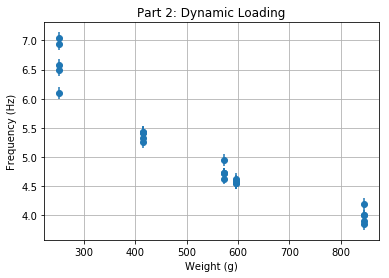

In [43]:
plt.figure(1)
plt.errorbar(df['Weight'], df['Frequency (Hz)'], yerr=2*df['error'], fmt='o')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency (Hz)')
plt.title('Part 2: Dynamic Loading')
plt.grid()
plt.show()